In [47]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [48]:
# The first line of code loads the autoreload extension
# The second line of code sets the autoreload mode to automatically reload all modules before each execution
# Without autoreload, you would need to restart the kernel and re-import the module to see the changes
# We no longer need to restart the kernel, but we have to re-import the module. Is this the expected behaviour?
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [49]:
!pip install torchsummary

In [50]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torchvision import datasets, transforms

In [51]:
# CUDA?
use_cuda = torch.cuda.is_available()
print("CUDA Available?", use_cuda)

device = torch.device("cuda" if use_cuda else "cpu")

CUDA Available? True


In [52]:
from gdrive.MyDrive.utils import *

In [53]:
train_loader, test_loader = getDataLoader(batch_size=512)

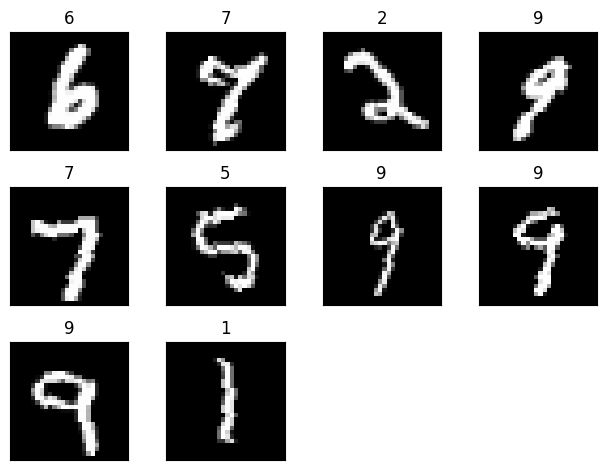

In [54]:
getSampleImages(train_loader, num_images = 10) # Need to fix this function as it can take a maximum of 12 images only

In [55]:
from gdrive.MyDrive.model import Net # Instead of import * because Net is in a conflict with something else,

In [56]:
model = Net().to(device)
getModelSummary(model)

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1           [-1, 32, 26, 26]             288
            Conv2d-2           [-1, 64, 24, 24]          18,432
            Conv2d-3          [-1, 128, 10, 10]          73,728
            Conv2d-4            [-1, 256, 8, 8]         294,912
            Linear-5                   [-1, 50]         204,800
            Linear-6                   [-1, 10]             500
Total params: 592,660
Trainable params: 592,660
Non-trainable params: 0
----------------------------------------------------------------
Input size (MB): 0.00
Forward/backward pass size (MB): 0.67
Params size (MB): 2.26
Estimated Total Size (MB): 2.93
----------------------------------------------------------------


In [57]:
optimizer = optim.SGD(model.parameters(), lr=0.001, momentum=0.9)
criterion = F.nll_loss
scheduler = optim.lr_scheduler.StepLR(optimizer, step_size=15, gamma=0.1, verbose=True)
num_epochs = 5

train_losses, test_losses, train_acc, test_acc = training(model, device, num_epochs, train_loader, test_loader, optimizer, criterion, scheduler)


Epoch 1


Train: Loss=2.2426 Batch_id=117 Accuracy=22.14: 100%|██████████| 118/118 [00:29<00:00,  4.06it/s]


Test set: Average loss: 2.2312, Accuracy: 3541/10000 (35.41%)

Epoch 2


Train: Loss=0.7256 Batch_id=117 Accuracy=60.97: 100%|██████████| 118/118 [00:23<00:00,  4.94it/s]


Test set: Average loss: 0.5405, Accuracy: 8409/10000 (84.09%)

Epoch 3


Train: Loss=0.4784 Batch_id=117 Accuracy=84.18: 100%|██████████| 118/118 [00:24<00:00,  4.85it/s]


Test set: Average loss: 0.3431, Accuracy: 9002/10000 (90.02%)

Epoch 4


Train: Loss=0.2448 Batch_id=117 Accuracy=88.72: 100%|██████████| 118/118 [00:28<00:00,  4.15it/s]


Test set: Average loss: 0.2608, Accuracy: 9192/10000 (91.92%)

Epoch 5


Train: Loss=0.1945 Batch_id=117 Accuracy=91.32: 100%|██████████| 118/118 [00:22<00:00,  5.27it/s]


Test set: Average loss: 0.1820, Accuracy: 9457/10000 (94.57%)



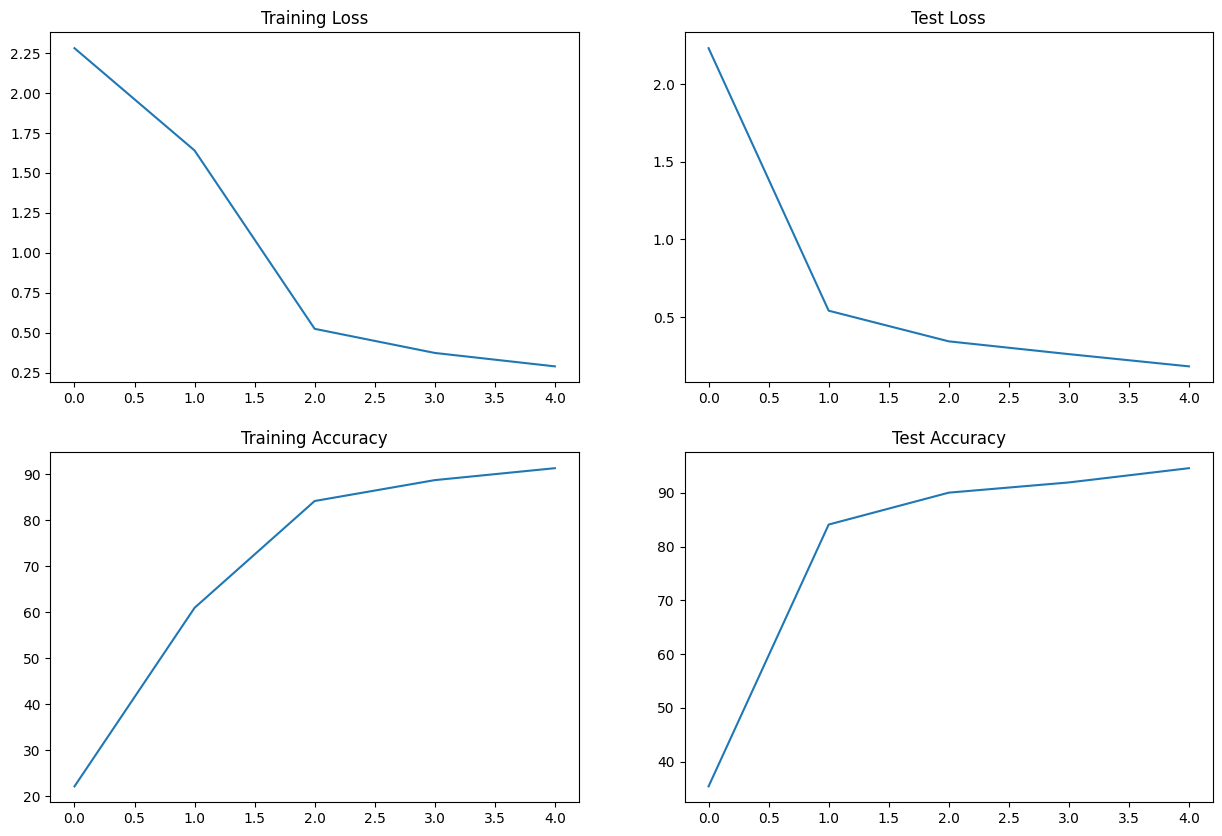

In [58]:
getTrainingTestPlots(train_losses, test_losses, train_acc, test_acc)